# 1. Title, Name and References

## Factors of influence in the Price of Used Cars in The Uk

#### Introduction

This project’s goal is to analyse what are the independent variables that can cause an impact over the price (outcome variable) of resale used car through different regression models and exercises. The dataset used for the study was obtained from the UK’s craigslist website, containing an initial shape of 4006 values rows, and 11 variables columns including the car model, year, price, transmission type, two columns for mileage travelled, two columns for fuel type, two columns for engine size, and the advertisement reference number. 
The methodology consisted of data cleansing and preparation, exploratory data analysis, construction of hypothesis and features observation, a simple linear regression model, linear regression model with Lasso/Ridge, and a polynomial regression exercise with Lasso/Ridge.

#### Team member
1. Ngoc Chau Tran - 300307368
2. Leozítor Floro de Souza - 300334919
3. Carolina Henrique de Melo Louback - 300306289

#### Reference
* [Predicting Boston House Prices](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)
* Class Notes

# 2. Library import and data loading

In [1]:
# all imports required for the project
#!pip install --upgrade scikit-learn pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
%matplotlib inline

#### Brief Explanation of data preparation

In order to clean the data, the first action was to drop the rolls with missing values as well as the columns that were not going to be used in the analysis. Secondly, the columns “price” and  “mileage” had special characters removed to enable converting their data types from string to numerical along with the numerical conversion for columns “engine_size” and "year". The duplicated columns for mileage, engine type, and fuel type were merged into one of each by filling the null values of the most complete column with the values from the least complete. Finaly, the categorical variables were processed by obtaining their dummy variables. The final clean data resulted with a shape of 14 variables with 3898 data points each. 

In [2]:
#Visualize uncleaned dataset dataframe head and tail
path="unclean_data.csv"

unclean_data = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

unclean_data

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [3]:
#Check how many rows and columns the dataset has
#Get shape
unclean_data.shape

(4006, 11)

In [4]:
#get column data value types
unclean_data.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [5]:
#Check for nan values in the dataset
unclean_data.isnull().values.any()

True

In [6]:
unclean_data.isna()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,False,False,False,False,True,False,False,False,True,True,False
1,False,False,False,False,True,False,False,False,True,True,False
2,False,False,False,False,True,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,True,True,False
4,False,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4001,False,False,False,False,False,False,False,False,False,False,False
4002,False,False,False,False,False,False,False,False,False,False,False
4003,False,False,False,False,False,False,False,False,False,False,False
4004,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Count how many nans in dataset columns
unclean_data.isna().sum()

model             99
year             102
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

In [8]:
#Check categorical variables (transmission, fuel type)
#transmission
unclean_data['transmission'].value_counts()

Semi-Auto    2071
Automatic    1636
Manual        199
Other           1
Name: transmission, dtype: int64

In [9]:
#fuel type
unclean_data['fuel type'].value_counts()

31        310
32        240
38        174
37        101
Diesel     83
30         76
25         65
29         57
33         50
34         29
26         25
36         17
39         17
43         13
Petrol     13
27         12
35         12
40          8
44          6
24          4
46          4
45          3
28          3
Hybrid      3
47          3
48          1
Name: fuel type, dtype: int64

# 3. Data Analysis, Preparation and Wrangling

### Professor Project Directions
Before you start, please take a look at the original csv file to find out about the data. Then, explore the dataset in your Jupyter notebook. Have a peek of the data. You should notice that the dataset is not clean. The followings are the issues that appear in the dataset:

1. [ ] There are missing rows (rows that have all NaN)
2. [ ] There are missing values in some columns
3. [ ] There are fields that use a wrong datatype, i.e., year is in float64 instead of int64. Hint: You can
use df.dtypes to look at the datatypes of each columns
4. [ ] There are columns that have mixed values, i.e., string and numbers
5. [ ] There is a column with currency symbol
6. [ ] Some numerical values are displayed with comma format
7. [ ] Some columns are using different standard values, i.e., engine size and engine size2
8. [ ] Some columns do not have valid names
9. [ ] There is a column with categorical data, i.e., transmission and fuel type
10. [ ] There are some unneeded columns

### Step 3.1 - Handling missing values

In [10]:
#Drop rolls where all values are NaN values
clean_df = unclean_data.dropna(how='all')
#Reset index from dataframe
clean_df = clean_df.reset_index(drop=True)

In [11]:
#Check how many  NaN values still exists and check data shape
clean_df.isnull().values.any()

True

In [12]:
clean_df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel type       2578
engine size       65
mileage2          17
fuel type2        99
engine size2      99
reference          0
dtype: int64

In [13]:
clean_df.shape #number of rows reduced from 4006 to 3907

(3907, 11)

In [14]:
clean_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


### Step 3.2 - Handling the currency symbols and comma format

In [15]:
#Replace currency symbols with empt space at price column
clean_df['price'] = clean_df['price'].str.replace('£','')

In [16]:
clean_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [17]:
#Replace comma character with empt space at price column
clean_df['price'] = clean_df['price'].str.replace(',','')
clean_df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [18]:
clean_df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel type       2578
engine size       65
mileage2          17
fuel type2        99
engine size2      99
reference          0
dtype: int64

In [19]:
clean_df.dtypes

model            object
year            float64
price            object
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

In [20]:
#Change data type of price into numeric using pd.to_numeric()
clean_df['price'] = pd.to_numeric(clean_df['price'])

In [21]:
clean_df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

### Step 3.3 - Handling non-valid column names

In [22]:
#Replace “fuel type”, “fuel type2”, “engine size”, and “engine size2” columns names for 
# “fuel_type”, “fuel_type2”, “engine_size” and “engine_size2” respectively.
clean_df.rename(columns={'fuel type':'fuel_type',
                          'fuel type2':'fuel_type2',
                          'engine size':'engine_size',
                          'engine size2':'engine_size2'}, 
                 inplace=True)
clean_df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


### Step 3.4 - Handling missing values in columns: fuel_type

In [23]:
#Check for missing values in fuel type columns
clean_df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel_type       2578
engine_size       65
mileage2          17
fuel_type2        99
engine_size2      99
reference          0
dtype: int64

In [24]:
#fill nan values in column fuel_type2 with values from column fuel_type
clean_df['fuel_type2'] = clean_df.fuel_type2.fillna(clean_df.fuel_type)
clean_df.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",Diesel,NaN,/ad/24913660


In [25]:
clean_df.isna().sum()

model              0
year               3
price              0
transmission       0
mileage           99
fuel_type       2578
engine_size       65
mileage2          17
fuel_type2         0
engine_size2      99
reference          0
dtype: int64

In [26]:
#since fuel_type still has a lot of missing values, we can drop this column
clean_df = clean_df.drop(columns=['fuel_type'],axis=1)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660


In [27]:
clean_df.shape

(3907, 10)

In [28]:
clean_df.isna().sum()

model            0
year             3
price            0
transmission     0
mileage         99
engine_size     65
mileage2        17
fuel_type2       0
engine_size2    99
reference        0
dtype: int64

In [29]:
#Rename fuel_type2 column into fuel_type
clean_df.rename(columns={'fuel_type2':'fuel_type'},inplace=True)

### Step 3.5 - Handling missing values and comma format in columns: mileage

In [30]:
#fill nan values in column mileage with values from column mileage2
clean_df['mileage'] = clean_df.mileage.fillna(clean_df.mileage2)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,"1,200",2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,"1,000",1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,"5,000",2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,"4,500",2,"4,500",Diesel,NaN,/ad/24913660


In [31]:
clean_df.isna().sum()

model            0
year             3
price            0
transmission     0
mileage          0
engine_size     65
mileage2        17
fuel_type        0
engine_size2    99
reference        0
dtype: int64

In [32]:
#Replace comma character with empt space at mileage column
clean_df['mileage'] = clean_df['mileage'].str.replace(',','')
clean_df.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,"4,500",Diesel,NaN,/ad/24913660


In [33]:
# drop the mileage2 column
clean_df = clean_df.drop(columns=['mileage2'],axis=1)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,Diesel,NaN,/ad/24913660


In [34]:
clean_df.shape

(3907, 9)

In [35]:
# check existing NaN values in the dataset
clean_df.isna().sum()

model            0
year             3
price            0
transmission     0
mileage          0
engine_size     65
fuel_type        0
engine_size2    99
reference        0
dtype: int64

In [36]:
#Convert mileage data type to numerical
clean_df['mileage'] = pd.to_numeric(clean_df['mileage'],errors='coerce')

In [37]:
clean_df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage         float64
engine_size      object
fuel_type        object
engine_size2     object
reference        object
dtype: object

### Step 3.6 - Handling missing values and different value standard in columns: engine_size 

In [38]:
#fill the missing values in engine_size2 with values from the engine_size column
clean_df['engine_size2']=clean_df['engine_size2'].fillna(clean_df.engine_size)
clean_df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2,/ad/24913660


In [39]:
# check existing NaN values in the dataset
clean_df.isna().sum()

model            0
year             3
price            0
transmission     0
mileage          4
engine_size     65
fuel_type        0
engine_size2     0
reference        0
dtype: int64

After converting the mileage column into numerical, 4 null datapoints are found. But they are going to be dropped in step 3.7 as it is not an expressive number and would not make a relevant impact in the analysis.

In [40]:
#convert engine_size2 column into numeric
clean_df['engine_size2'] = pd.to_numeric(clean_df['engine_size2'],errors='coerce')
clean_df['engine_size2'] = clean_df['engine_size2'].apply(lambda x: round(x/1000, 1) if x > 1000 else round(x, 1))


In [41]:
clean_df.head()

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,2.0,/ad/24913660


In [42]:
#drop column engine_size.
clean_df= clean_df.drop(columns=['engine_size'],axis=1)
clean_df.shape

(3907, 8)

In [43]:
#rename columns
clean_df.rename(columns={'engine_size2':'engine_size'},inplace=True)
clean_df.shape

(3907, 8)

### Step 3.7 - Handling wrong data type: year 

In [44]:
clean_df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage         float64
fuel_type        object
engine_size     float64
reference        object
dtype: object

In [45]:
# check existing NaN values in the dataset
clean_df.isna().sum()

model           0
year            3
price           0
transmission    0
mileage         4
fuel_type       0
engine_size     2
reference       0
dtype: int64

In [46]:
# remove NaN values in the dataset
clean_df = clean_df.dropna()

In [47]:
# check existing NaN values in the dataset
clean_df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuel_type       0
engine_size     0
reference       0
dtype: int64

In [50]:
# change the data type of the year column into integer format
clean_df['year'] = clean_df['year'].astype('int64')
clean_df.shape

(3898, 8)

In [51]:
clean_df.dtypes # show data type

model            object
year              int64
price             int64
transmission     object
mileage         float64
fuel_type        object
engine_size     float64
reference        object
dtype: object

### Step 3.8 - Handling unneeded columns 

In [52]:
clean_df = clean_df.drop(columns=['model', 'reference'])
clean_df.shape

(3898, 6)

### Step 3.9 - Handling categorical data 

In [54]:
# change categorial data of transmission into dummy values
transmission = pd.get_dummies(clean_df['transmission']) # to get the dummy values and store in a variable called transmission
clean_df = clean_df.join(transmission) # add the dummy values to new columns
clean_df.head()

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0


In [55]:
# rename the column name of 'Other' (a dummy value of transmission column) into 'OtherTransmission' since fuel_type column has a dummy value named 'Other' too
clean_df.rename(columns={'Other' : 'OtherTransmission'}, inplace=True)
clean_df.head(30)

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0
5,2020,30999,Automatic,1000.0,Diesel,2.0,1,0,0,0
6,2020,35999,Automatic,500.0,Diesel,2.0,1,0,0,0
7,2019,37990,Automatic,1412.0,Petrol,3.0,1,0,0,0
8,2019,28990,Automatic,3569.0,Diesel,2.0,1,0,0,0
9,2019,28990,Automatic,3635.0,Diesel,2.0,1,0,0,0


In [56]:
clean_df.isna().sum()

year                 0
price                0
transmission         0
mileage              0
fuel_type            0
engine_size          0
Automatic            0
Manual               0
OtherTransmission    0
Semi-Auto            0
dtype: int64

In [57]:
# Process categories data for fuel type
fuel_type = pd.get_dummies(clean_df['fuel_type'])
clean_df = clean_df.join(fuel_type)
clean_df.head()

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [58]:
# rename the new column name of 'Other' into 'OtherFuel' 
clean_df.rename(columns={'Other' : 'OtherFuel'}, inplace=True)
clean_df.head(30)

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
5,2020,30999,Automatic,1000.0,Diesel,2.0,1,0,0,0,1,0,0,0
6,2020,35999,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
7,2019,37990,Automatic,1412.0,Petrol,3.0,1,0,0,0,0,0,0,1
8,2019,28990,Automatic,3569.0,Diesel,2.0,1,0,0,0,1,0,0,0
9,2019,28990,Automatic,3635.0,Diesel,2.0,1,0,0,0,1,0,0,0


In [59]:
print("Clean dataset with {} data points {} variable each.".format(*clean_df.shape))

Clean dataset with 3898 data points 14 variable each.


In [60]:
clean_df.dtypes

year                   int64
price                  int64
transmission          object
mileage              float64
fuel_type             object
engine_size          float64
Automatic              uint8
Manual                 uint8
OtherTransmission      uint8
Semi-Auto              uint8
Diesel                 uint8
Hybrid                 uint8
OtherFuel              uint8
Petrol                 uint8
dtype: object

### Step 3.10 - Saving the cleaned data into csv

In [61]:
clean_df.to_csv('cleaned_data_Group2.csv', index=False)

# 4. Exploratory Data Analysis and Visualization

In [62]:
#Observe the clean dataset statistics
clean_df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Relationship between mileage and the price?

Text(0.5, 1.0, 'Price vs Mileage count')

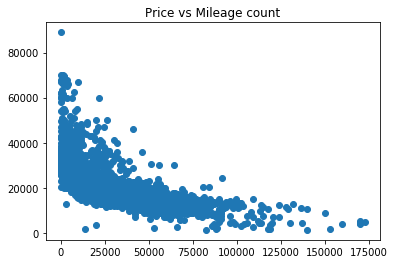

In [63]:
#Is there any relationship between the average price of used cars and the mileage count? 
plt.scatter(clean_df.mileage, clean_df.price)
plt.title('Price vs Mileage count')

#### Comments:
As illustrated, the higher the mileage count, the lower will be the price the car may cost. As an outlier, there is one data point of price over 80000 that will be removed for the analysis.

Text(0, 0.5, 'Price')

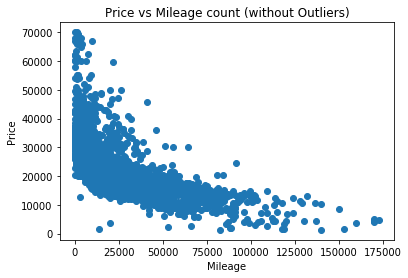

In [65]:
clean_df.drop(clean_df.loc[clean_df["price"]>80000].index, inplace=True) 
plt.scatter(clean_df.mileage, clean_df.price)
plt.title('Price vs Mileage count (without Outliers)')
plt.xlabel('Mileage')
plt.ylabel('Price')
#plt.savefig('mileage vs price.png', dpi=400, bbox_inches='tight')

#### Relationship between year and the price?

Text(0.5, 1.0, 'Price vs Year')

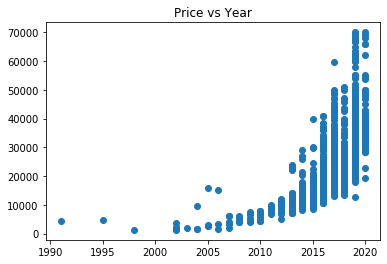

In [66]:
#Is there any relationship between the average price of used cars and the year it was manufactured?
plt.scatter(clean_df.year, clean_df.price)
plt.title('Price vs Year')


#### Comments:
As we can see, the price is negatively affected by the increase of year value. The Older the Car, the cheaper it will cost.

#### Relationship between engine size and the price?

Text(0.5, 1.0, 'Price vs Engine Size')

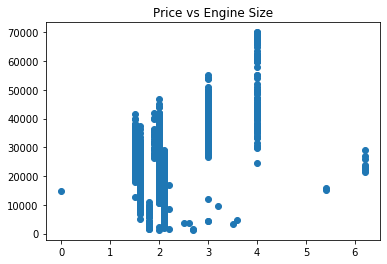

In [67]:
#Is there any relationship between the average price of used cars and the engine size?
plt.scatter(clean_df.engine_size, clean_df.price)
plt.title('Price vs Engine Size')

#### Comments:
Similarly to mileage, we can see that there is an outlier beyond point 5 where the price suddenly decreases. That could be excluded for the sake of this analysis. 

In [68]:
#Exclude outlier
clean_df.drop(clean_df.loc[clean_df["engine_size"]>5].index,inplace=True)

Text(0.5, 1.0, 'Price vs Engine Size (without outlier)')

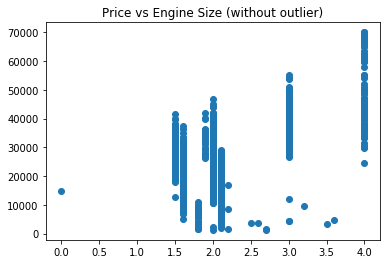

In [69]:
#Relationship plot after dropping outlier
plt.scatter(clean_df.engine_size, clean_df.price)
plt.title('Price vs Engine Size (without outlier)')

#### Relationship between fuel type  and the price?

Text(0.5, 1.0, 'Price vs Fuel Type')

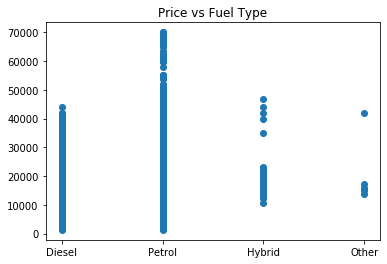

In [70]:
#Is there any relationship between the average price of used cars and the fuel type?
plt.scatter(clean_df.fuel_type, clean_df.price)
plt.title('Price vs Fuel Type')

#### Comments:
We can observe, the car fuel type do not independently affect the price variation.

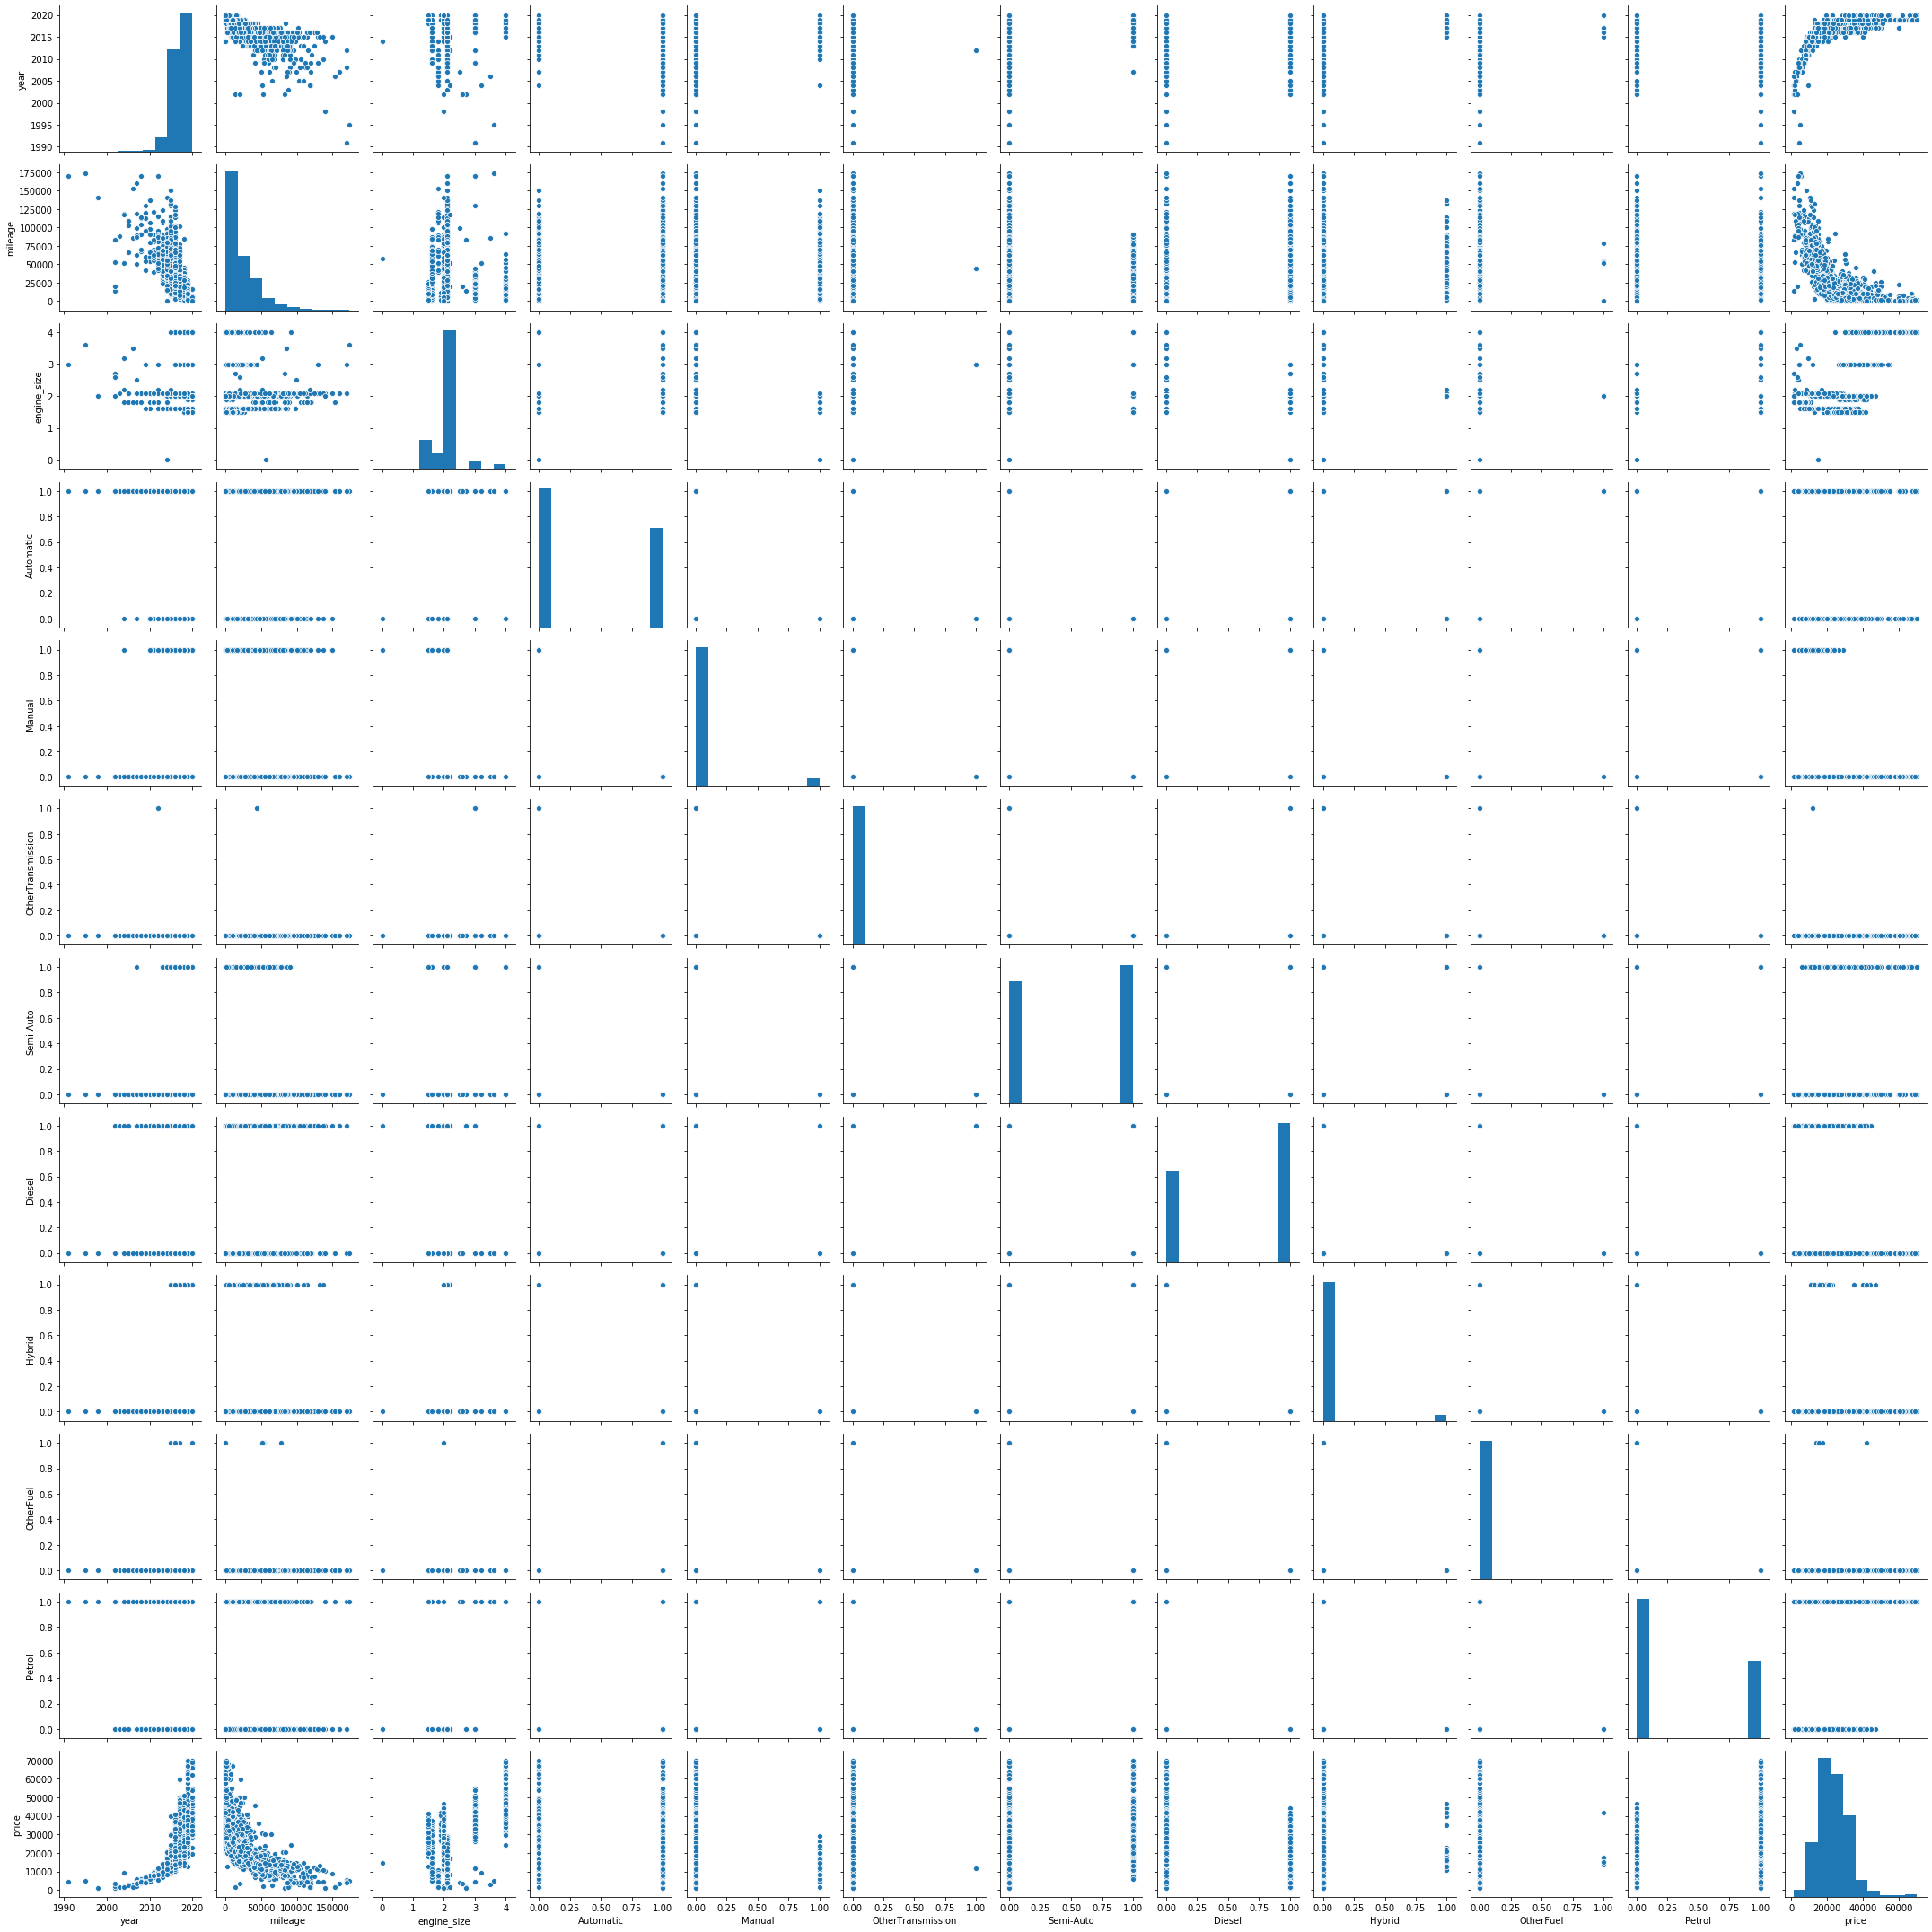

In [71]:
#More general visualizations of the data
sns.pairplot(clean_df[['year', 'mileage', 'engine_size', 'Automatic', 'Manual', 'OtherTransmission',
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol','price']], height=2.5)
plt.tight_layout()

In [72]:
# Obtain Correlations coefficients
clean_df.corr()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
year,1.000000,0.682994,-0.776060,-0.129176,-0.200500,-0.168941,-0.039363,0.274009,-0.143429,-0.098698,-0.009422,0.187041
price,0.682994,1.000000,-0.682491,0.413022,-0.096540,-0.242487,-0.021030,0.203181,-0.255191,-0.112566,-0.016599,0.307357
mileage,-0.776060,-0.682491,1.000000,0.089013,0.181919,0.221090,0.015870,-0.277928,0.180800,0.190922,0.045296,-0.265329
engine_size,-0.129176,0.413022,0.089013,1.000000,0.081257,-0.049206,0.035736,-0.059705,-0.004088,0.003171,-0.002235,0.003079
Automatic,-0.200500,-0.096540,0.181919,0.081257,1.000000,-0.196538,-0.013573,-0.900871,0.022723,0.089149,0.046484,-0.062957
Manual,-0.168941,-0.242487,0.221090,-0.049206,-0.196538,1.000000,-0.003727,-0.247397,0.029147,-0.046713,-0.009136,-0.010184
OtherTransmission,-0.039363,-0.021030,0.015870,0.035736,-0.013573,-0.003727,1.000000,-0.017085,0.013048,-0.003226,-0.000631,-0.011973
Semi-Auto,0.274009,0.203181,-0.277928,-0.059705,-0.900871,-0.247397,-0.017085,1.000000,-0.035747,-0.067353,-0.041876,0.067092
Diesel,-0.143429,-0.255191,0.180800,-0.004088,0.022723,0.029147,0.013048,-0.035747,1.000000,-0.247237,-0.048354,-0.917604
Hybrid,-0.098698,-0.112566,0.190922,0.003171,0.089149,-0.046713,-0.003226,-0.067353,-0.247237,1.000000,-0.007907,-0.150047


In [73]:
#Select only numericalvariables to visualize heatmap
num_var = clean_df[['year', 'mileage', 'engine_size','price']]

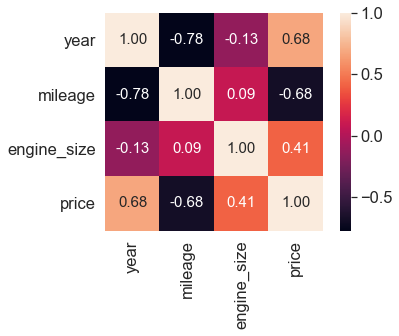

In [74]:
#Correlations heatmap
cm = np.corrcoef(num_var.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':15},
               yticklabels=num_var.columns,
               xticklabels=num_var.columns)

#### Comments:
We can see in the heat map, there is a high negative correlation (-0.78) among the variables year and mileage,indicating the higher the year the smaller will be the milleage count; also with mileage and price (-0.68) which can imply that the higher the mileage count the smaller will be the price value. But there is a high positive correlation between year and price (0.68) which confirms the hypothesis that the newer the car the more expensive it will be.

# 5. Feature Observation and Hypothesis

In [75]:
#Observe the clean dataset statistics
clean_df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000
mean,2017.356408,23665.792589,22315.686052,2.024884,0.417138,0.051209,0.000257,0.531395,0.601904,0.038857,0.001544,0.357694
std,2.183439,8904.608344,22576.158703,0.437838,0.493150,0.220453,0.016042,0.499078,0.489568,0.193280,0.039269,0.479383
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14606.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32344.500000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,69995.000000,173000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature observation
1. As we can observe here, engize_size after cleaning has value minimum of 0, it's quite illogical as no car may have. Hence, it should be cleaned.
2. there are some outliers with the year as the minimum year is 1991, while the 1st quartile of year is 2016, median is 2018, 3rd IQR is 2019, so we will drop these outliers

Text(0.5, 1.0, 'Price vs Year')

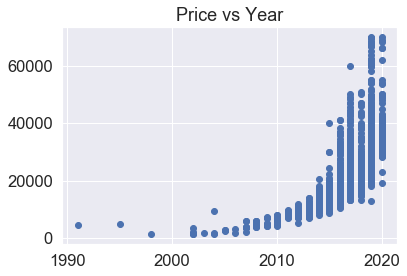

In [76]:
#Is there any relationship between the average price of used cars and the year it was manufactured?
plt.scatter(clean_df.year, clean_df.price)
plt.title('Price vs Year')
#=> drop outlier for the year before 2000

In [77]:
# drop rows that has 0 value in engine_size column
clean_df.drop(clean_df.loc[clean_df["engine_size"]==0].index, inplace=True)


In [78]:
## drop rows which have value in year columns less than 2000, drop the ouliers
clean_df.drop(clean_df.loc[clean_df["year"]<2000].index, inplace=True)
clean_df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0,0,0,0,1
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0,1,0,0,0
3903,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0,1,0,0,0
3904,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0,1,0,0,0
3905,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0,1,0,0,0


In [79]:
clean_df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000,3882.000000
mean,2017.374807,23683.675940,22199.560536,2.024755,0.416795,0.051005,0.000258,0.531942,0.602267,0.038897,0.001546,0.357290
std,2.089202,8890.254624,22245.106676,0.435843,0.493092,0.220036,0.016050,0.499043,0.489493,0.193376,0.039289,0.479263
min,2002.000000,1295.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17699.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14572.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32214.500000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,69995.000000,170000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


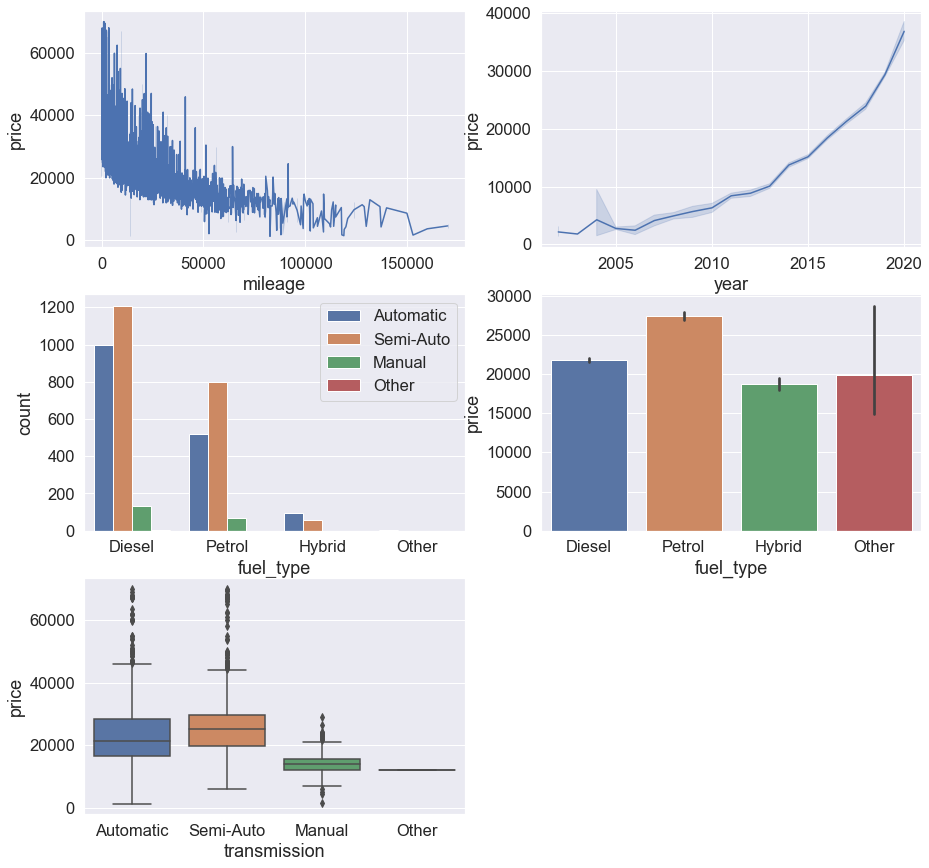

In [80]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=[15,20])
plt.subplot(421)
sns.lineplot(x='mileage',y='price',data=clean_df)

plt.subplot(422)
sns.lineplot(x='year',y='price',data=clean_df)

plt.subplot(423)
sns.countplot('fuel_type',hue='transmission',data=clean_df)
plt.legend(loc='upper right')

plt.subplot(424)
sns.barplot(x='fuel_type',y='price',data=clean_df)

plt.subplot(425)
sns.boxplot(x='transmission',y='price',data=clean_df)

#### From the data visualization, we can make some inital hypothesis:
* The higher the mileage count, the lower the price will be. It's reasonable that car that has been riden longer distances (greater mialge count), will cheaper to purchase.
* The newer the car is (the more recent is its year of manufacte), the higher will be the cost.
* Tramission type Manuel can cause cars to be cheaper in the market whem compared to automatic and semi-auto types.

# 6. Training Models

### Useful Functions

In [81]:
def plot_pred_act(y_pred, y_test):
    # plot the prediction vs actual(y test or ground truth)
    plt.scatter(y_pred, y_test, alpha=.7, color='b')
    plt.plot(y_test, y_test, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.show()
    
def print_metrics(rmse_train, r2_train, rmse_test, r2_test):
    print("The model performance for the training set")
    print("-------------------------------------------")
    print(f"RMSE of training set is {rmse_train:.3f}")
    print(f"R2 score of training set is {r2_train:.3f}")

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print(f"RMSE of test set is {rmse_test:.3f}")
    print(f"R2 score of test set is {r2_test:.3f}")

    print("The model plot for test set for predictions x actual prices")
    print("-------------------------------------------")
    
def regression_model(X_train, y_train, X_test, y_test, model, print_output=True, show_plot=True):
    """Generic function to train and measure performance of a regression model"""
    model.fit(X_train, y_train)
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
    r2_test = r2_score(y_test, y_test_predicted)

    if print_output:
        print_metrics(rmse_train, r2_train, rmse_test, r2_test)
    if show_plot:
        plot_pred_act(y_test_predicted, y_test)
    return rmse_train, r2_train, rmse_test, r2_test

### Splitting Dataset

Loading Cleaned CSV

In [82]:
# Constant Variables
SEED=42

In [83]:
PATH = 'cleaned_data.csv'; df = pd.read_csv(PATH, index_col=0); df
#PATH = 'cleaned_data_Group2.csv'; df = pd.read_csv(PATH); df

,model,year,transmission,mileage,fuelType,engineSize,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol,price
0,C Class,2020,Automatic,1200,Diesel,2.0,1,0,0,0,1,0,0,0,30495
1,C Class,2020,Automatic,1000,Petrol,1.5,1,0,0,0,0,0,0,1,29989
2,C Class,2020,Automatic,500,Diesel,2.0,1,0,0,0,1,0,0,0,37899
3,C Class,2019,Automatic,5000,Diesel,2.0,1,0,0,0,1,0,0,0,30399
4,C Class,2019,Automatic,4500,Diesel,2.0,1,0,0,0,1,0,0,0,29899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,C Class,2017,Manual,31357,Diesel,1.6,0,1,0,0,1,0,0,0,14700
3895,C Class,2018,Automatic,28248,Diesel,2.1,1,0,0,0,1,0,0,0,18500
3896,C Class,2014,Manual,48055,Diesel,2.1,0,1,0,0,1,0,0,0,11900
3897,C Class,2014,Automatic,49865,Diesel,2.1,1,0,0,0,1,0,0,0,11300


Selecting useful columns to be used as input: **indep_var** and to be predicted: **dep_var**


In [84]:
indep_var = ['year', 'mileage', 'engineSize', 'Automatic', 'Manual', 'OtherTransmission', # independent vars
        'Semi-Auto', 'Diesel', 'Hybrid', 'OtherFuel', 'Petrol']
dep_var = 'price' # dependent var

Split Train and Test sets chosen randomly, 20% full dataset for Test and 80% for Train

Splitting both **Train** and **Test** sets into **X** dependent and **y** the independent variables dataframes for each

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df[indep_var], df[dep_var], test_size=0.2, random_state = 42)

## 6.1 A Simple Linear Regression Model

In [86]:
# Creating linear regression object
regr = LinearRegression()
print("Linear Regression Model object Created")

Linear Regression Model object Created


In [87]:
# Training the Model
regr.fit(X_train, y_train)
print("Linear Regression Model Trained")

Linear Regression Model Trained


In [88]:
# getting the predictions on Test set
y_pred = regr.predict(X_test)
print("Predictions in Testset Calculated")

Predictions in Testset Calculated


In [89]:
# Checking the Roots Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE is {mse**0.5}")

RMSE is 4404.295476072169


In [90]:
# Checking the Score
r2 = regr.score(X_train, y_train)
print(f"R2 Train Score is {r2:.2f}\n")
r2 = regr.score(X_test, y_test)
print(f"R2 Test Score is {r2}\n")

R2 Train Score is 0.76

R2 Test Score is 0.777605488387421



#### Comments: 
Considering that the R2 score is a metric that goes from 0 ( Bad ) to 1 (Best).
A score of 0.77 means that the model is ok, but A Linear model is the simplest model for prediction, let's try a better one.

Plotting the predictions vs actual prices

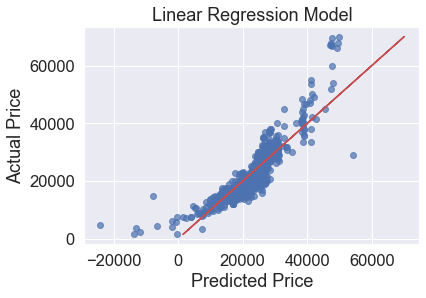

In [91]:
plot_pred_act(y_pred, y_test)

#### Comments:
Looking at the Plot we can see that somes minor cases get a negative predictions what is not realistic and the values are a little bit to the right,most are near the red line that would be the goal, a really linear model.

So let's define a linear regression function for further use and comparison

In [92]:
# probably will delete
def linear_regression_model(X_train, y_train, X_test, y_test, print_output=True):
    """Creates a Linear Regression model for the given  X_train, y_train, X_test, y_test"""
    
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_train_predicted = regr.predict(X_train)
    y_test_predicted = regr.predict(X_test)
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
    r2_test = r2_score(y_test, y_test_predicted)

    if print_output:
        print_metrics(rmse_train, r2_train, rmse_test, r2_test)
        plot_pred_act(y_test_predicted, y_test)
    return rmse_train, r2_train, rmse_test, r2_test

In [93]:
linear_regression_model(X_train, y_train, X_test, y_test, False)

(4309.030190713749, 0.7635300773612165, 4404.295476072169, 0.777605488387421)

## 6.2 Linear Regression Model with Lasso/Ridge

### 6.2.1 Linear Regression Model with Lasso

In [94]:
# creating the Lasso object
clf_lasso = Lasso(alpha=0.1, random_state=SEED)
print("Linear Regression with Lasso  Model object Created")

Linear Regression with Lasso  Model object Created


In [95]:
clf_lasso.fit(X_train, y_train)
print("Linear Regression with Lasso  Model Trained")

Linear Regression with Lasso  Model Trained


In [96]:
# getting the predictions on Test set
y_pred = clf_lasso.predict(X_test)
print("Predictions in Testset Calculated")

Predictions in Testset Calculated


In [97]:
# Checking the Score
r2 = clf_lasso.score(X_train, y_train)
print(f"R2 Train Score is {r2:.2f}\n")
r2 = clf_lasso.score(X_test, y_test)
print(f"R2 Test Score is {r2}\n")

R2 Train Score is 0.76

R2 Test Score is 0.7775918148058172



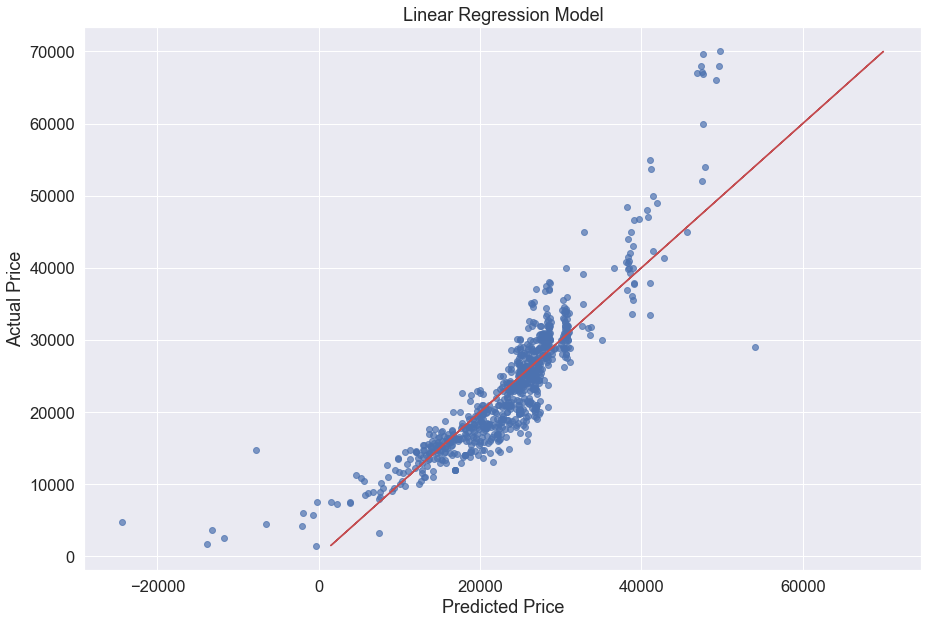

In [98]:
# plot the prediction vs actual
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7, color='b')
plt.plot(actual_values, actual_values, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [99]:
# Checking the Roots Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE is {rmse}")

RMSE is 4404.43086962914


Let's define a function to create lasso model for further use

 Now let's run Lasso trying more parameters for alpha and check the results

In [100]:
alphas = np.linspace(0.1, 2, 20)
metrics = {"alpha":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for alpha in alphas:
    #print(f"Lasso model alpha: {alpha}" )
    clf_lasso = Lasso(alpha=alpha, random_state=SEED)
    x, y, z, w = regression_model(X_train, y_train, X_test, y_test, clf_lasso, print_output=False, show_plot=False)
    metrics["alpha"].append(alpha)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13305304492.18103, tolerance: 24490550.04888086
  positive)


,alpha,RMSE Train,R2 Train,RMSE Test,R2 Test
0,0.1,4309.034635,0.763530,4404.430870,0.777592
1,0.2,4309.047762,0.763528,4404.502435,0.777585
2,0.3,4309.069921,0.763526,4404.607276,0.777574
3,0.4,4309.100821,0.763522,4404.713895,0.777563
4,0.5,4309.140550,0.763518,4404.821856,0.777552
5,0.6,4309.189107,0.763513,4404.931158,0.777541
6,0.7,4309.246498,0.763506,4405.041796,0.777530
7,0.8,4309.312711,0.763499,4405.153781,0.777519
8,0.9,4309.387749,0.763491,4405.267109,0.777507
9,1.0,4309.471621,0.763482,4405.381774,0.777496


### 6.2.2 Linear Regression Model Ridge

In [101]:
alphas = np.linspace(0.001, 10, 10)**2
np.exp
for alpha in alphas:
    print(f"Lasso model alpha: {alpha}" )
    clf_ridge = Ridge(alpha=alpha, random_state=SEED)
    regression_model(X_train, y_train, X_test, y_test, clf_ridge, show_plot=False)
    print("---------------------------------------------------------------------------------------------------------------------------------")

Lasso model alpha: 1e-06
The model performance for the training set
-------------------------------------------
RMSE of training set is 4309.030
R2 score of training set is 0.764


The model performance for the test set
-------------------------------------------
RMSE of test set is 4404.295
R2 score of test set is 0.778
The model plot for test set for predictions x actual prices
-------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------
Lasso model alpha: 1.2365439999999996
The model performance for the training set
-------------------------------------------
RMSE of training set is 4309.248
R2 score of training set is 0.764


The model performance for the test set
-------------------------------------------
RMSE of test set is 4405.906
R2 score of test set is 0.777
The model plot for test set for predictions x actual prices
-------------------------------------------
---

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.41918e-19): result may not be accurate.
  overwrite_a=True).T


## 6.3 Polynomial Regression Model (with Lasso/Ridge)

Defining method to Create the Polynomial regression model calculate the RMSE, r2 score, plot the graph actual prices x predictions

In [102]:
def polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test, model, print_output=True, show_plot=False):
    "Creates a polynomial regression model for the given degree and X_train,Y_train, X_test, Y_test"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)

    if print_output:
        print_metrics(rmse_train, r2_train, rmse_test, r2_test)
    if show_plot:
        plot_pred_act(y_test_predict, Y_test)
    
    return rmse_train, r2_train, rmse_test, r2_test

In [103]:
def create_polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test, print_output=True, show_plot=False):
    "Creates a polynomial regression model for the given degree and X_train,Y_train, X_test, Y_test"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)

    if print_output:
        print_metrics(rmse_train, r2_train, rmse_test, r2_test)
    if show_plot:
        plot_pred_act(y_test_predict, Y_test)

In [104]:
degrees = np.linspace(1,6,6)
for degree in degrees:
    create_polynomial_regression_model(int(degree), X_train, y_train, X_test, y_test)


The model performance for the training set
-------------------------------------------
RMSE of training set is 4309.030
R2 score of training set is 0.764


The model performance for the test set
-------------------------------------------
RMSE of test set is 4404.295
R2 score of test set is 0.778
The model plot for test set for predictions x actual prices
-------------------------------------------
The model performance for the training set
-------------------------------------------
RMSE of training set is 3233.140
R2 score of training set is 0.867


The model performance for the test set
-------------------------------------------
RMSE of test set is 3222.995
R2 score of test set is 0.881
The model plot for test set for predictions x actual prices
-------------------------------------------
The model performance for the training set
-------------------------------------------
RMSE of training set is 2872.676
R2 score of training set is 0.895


The model performance for the test set
-

#### let's try different deegrees examples and compare the results.

Degree = 2

Using polynomial of degree 2 gives a better result than previous linear models,
RMSE of 3233 and
R2 Score of 0.881 in Test Set
let's keep increasing the deegree ans see what happens...

Degree = 3

In [105]:
create_polynomial_regression_model(3, X_train, y_train, X_test, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 2872.676
R2 score of training set is 0.895


The model performance for the test set
-------------------------------------------
RMSE of test set is 2984.350
R2 score of test set is 0.898
The model plot for test set for predictions x actual prices
-------------------------------------------


#### Comments:
We can see that using a Degree of 3 gives a much better result that the previous polynomial deegree = 2 model.
What happens if we keep increading the deegree of polynom?

Let's see Degree = 4

In [106]:
create_polynomial_regression_model(4, X_train, y_train, X_test, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 2880.884
R2 score of training set is 0.894


The model performance for the test set
-------------------------------------------
RMSE of test set is 3002.993
R2 score of test set is 0.897
The model plot for test set for predictions x actual prices
-------------------------------------------


#### Comments:
Using a polynom deegre = 4 we reach a different situation, the RMSE on training was improved compared to the degree=3 model, but the RMSE on test set decreased comparing to the deegree=3 model which tell us that this model is overffiting and if we keep increasing the deegre, it will improve perfoemance on training set but decrease on test set!

The conslusion using the polynomial is that the degree = 3 fits better than other models

### Polynomial model with Lasso 

In [107]:
metrics = {"Degree":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for degree in [1, 2, 3, 4, 5, 6]:
    #print(f"Degree: {degree}" )
    x, y, z, w = polynomial_regression_model(degree, X_train, y_train, X_test, y_test, Lasso(alpha=0.1, random_state=SEED), print_output=False, show_plot=False)
    metrics["Degree"].append(degree)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18277216368.246677, tolerance: 24490550.04888086
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13838890987.404152, tolerance: 24490550.04888086
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12964929033.509954, tolerance: 24490550.04888086
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

,Degree,RMSE Train,R2 Train,RMSE Test,R2 Test
0,1,4309.034635,0.763530,4404.430870,0.777592
1,2,3421.270131,0.850930,3503.508244,0.859273
2,3,2976.085774,0.887200,3123.493452,0.888146
3,4,2881.492984,0.894257,2954.012627,0.899955
4,5,2842.983851,0.897064,2934.004645,0.901306
5,6,2815.730640,0.899028,3034.852006,0.894404


### Polynomial Model With Ridge

In [108]:
metrics = {"Degree":[], "RMSE Train":[], "R2 Train":[], "RMSE Test":[], "R2 Test":[]}
for degree in [1, 2, 3, 4, 5, 6]:
    #print(f"Degree: {degree}" )
    x, y, z, w = polynomial_regression_model(degree, X_train, y_train, X_test, y_test, Ridge(alpha=0.1, random_state=SEED), print_output=False, show_plot=False)
    metrics["Degree"].append(degree)
    metrics["RMSE Train"].append(x)
    metrics["R2 Train"].append(y)
    metrics["RMSE Test"].append(z)
    metrics["R2 Test"].append(w)
pd.DataFrame(metrics)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.9737e-24): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


,Degree,RMSE Train,R2 Train,RMSE Test,R2 Test
0,1,4309.034681,0.763530,4404.444689,0.777590
1,2,3276.522980,0.863276,3320.012618,0.873628
2,3,2961.322456,0.888317,3097.633837,0.889990
3,4,2942.702351,0.889717,3477.855024,0.861326
4,5,6166.793492,0.515676,6681.058959,0.488245
5,6,6943.819550,0.385936,7548.609507,0.346711
